In [3]:
#>  python3 -c "import jupyter, matplotlib, numpy, pandas,scipy, sklearn"
#> juypter notebook

import os
import tarfile
from six.moves import urllib

download_root = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
Housing_path = os.path.join("datasets", "housing")
Housing_url = download_root + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=Housing_url, housing_path=Housing_path):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
        tgz_path = os.path.join(housing_path, "housing.tgz")
        urllib.request.urlretrieve(housing_url, tgz_path)
        housing_tgz=tarfile.open(tgz_path)
        housing_tgz.extractall(path=housing_path)
        housing_tgz.close()

In [4]:
import pandas as pd

def load_housing_data(housing_path=Housing_path):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [8]:
fetch_housing_data()
housing = load_housing_data()
#housing[0:24]
housing.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
# obtain information on the dataframe
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
# column "ocean_proximity" per above table contains non-numerical data types
# below gets the distinct num of entries from this column
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [6]:
# SICK Method;
# display summary of the numerical entries
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


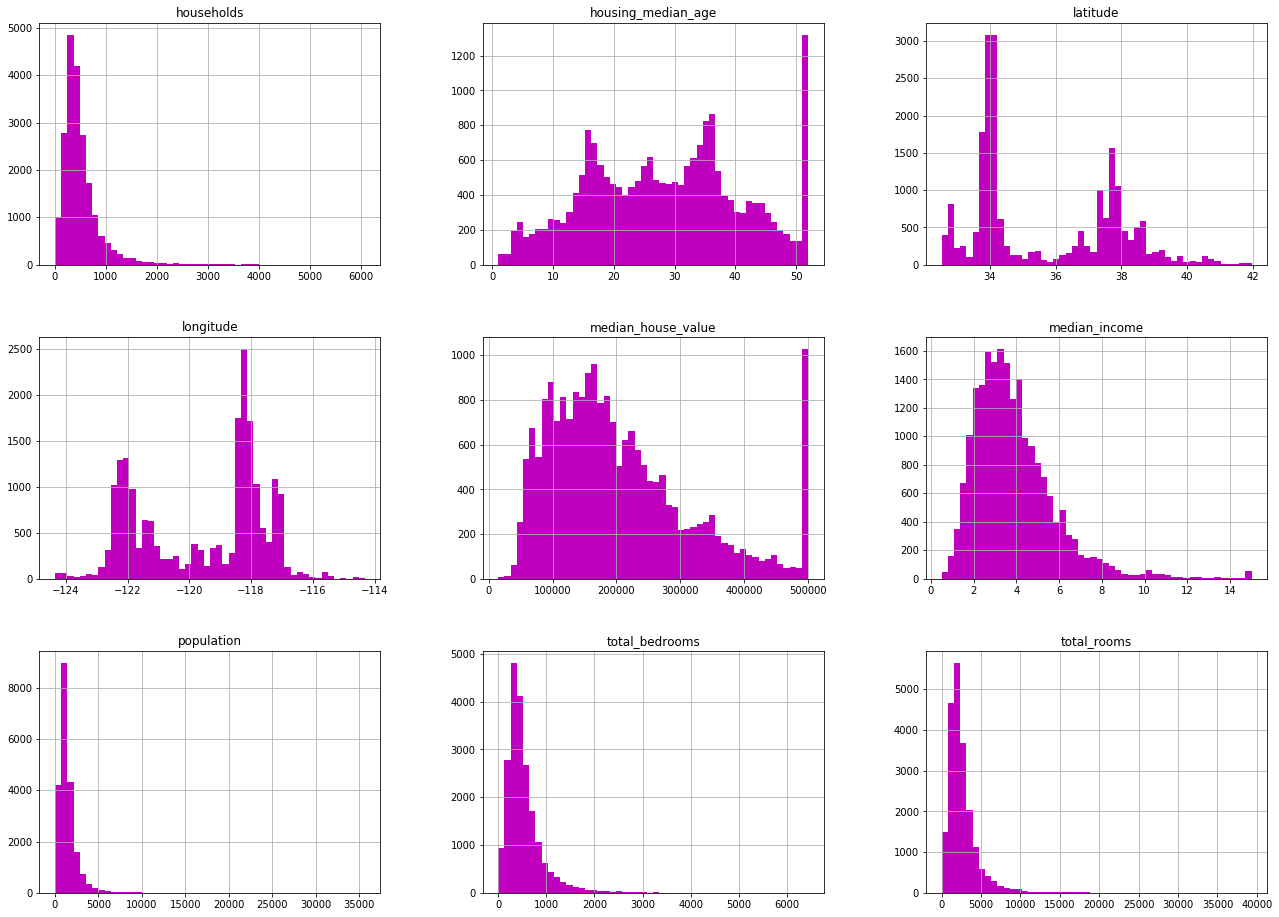

In [10]:
import matplotlib.pyplot as plt
housing.hist(bins = 50,figsize=(22,16), color = "m")
plt.show()

In [8]:
# take 20% as training set
# np.random_permutation -> https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.random.permutation.html
# .iloc SICK Function
import numpy as np
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices =shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

train_set, test_set = split_train_test(housing, 0.2)


In [9]:
# or instead of using the above function we defined;
# just use a Scikit split function (built-in)

from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size = 0.2, random_state = 42)
train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,103000.0,NEAR OCEAN
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,382100.0,NEAR OCEAN
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,172600.0,NEAR OCEAN
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,93400.0,NEAR OCEAN
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,96500.0,INLAND


In [10]:
# CUTE medhot .copy
j = train_set.copy()

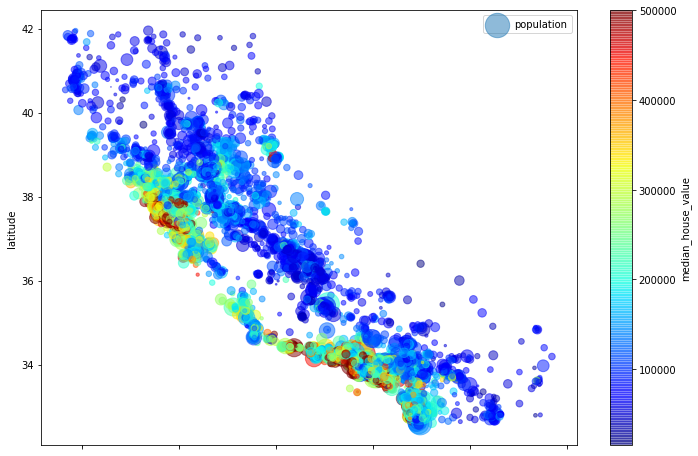

In [11]:
# s, c, cmap, alpha, more for a great scatter chart
a = j.plot(figsize = (12,8), 
           s = housing["population"]/30, label = "population",
           alpha = 0.5, 
           kind = "scatter",
           x = "longitude", y = "latitude", 
           c= "median_house_value", cmap = plt.get_cmap("jet"), colorbar = True)

In [12]:
# Quick way to get correlation
corr_matrix = j.corr()
corr_matrix["median_house_value"].sort_values(ascending = False)
#Note, corr only measures linear correlation

median_house_value    1.000000
median_income         0.690647
total_rooms           0.133989
housing_median_age    0.103706
households            0.063714
total_bedrooms        0.047980
population           -0.026032
longitude            -0.046349
latitude             -0.142983
Name: median_house_value, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F470712128>,
      dtype=object)

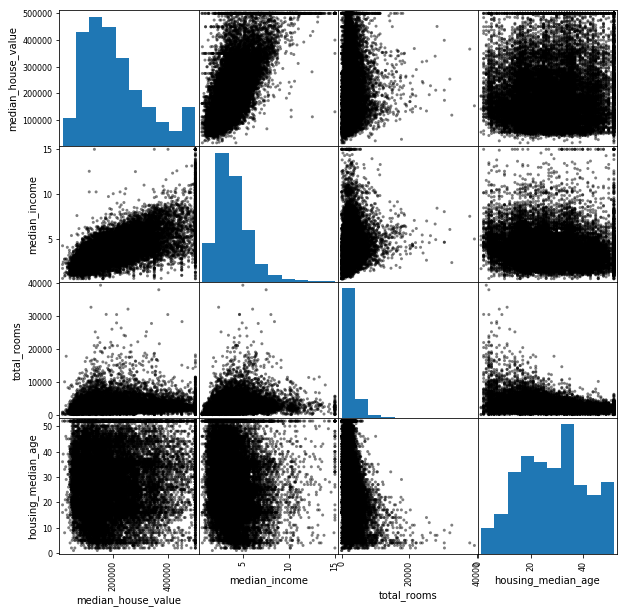

In [13]:
# Another way to get correlation
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize = (10,10), color = "k")

In [14]:
#  =====================

In [15]:
# Get ready for ML training;
# .drop to remove y

x = train_set.drop("median_house_value", axis = 1) # take out Y
y_label = train_set["median_house_value"].copy()

In [16]:
# NULL-Entry, missing value Treatment
# 4 ways to do it 
x.dropna(subset = ["total_bedrooms"])  #1
x.drop("total_bedrooms", axis = 1)     #2

median = x["total_bedrooms"].median    #3
x["total_bedrooms"].fillna(median, inplace = True)

In [17]:
# this is the 4th Way
# use sklearn's imputer

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = "median")

# so now the imputer will compute median for all columns, but we need to remove the non-numeric columns
only_numeric_x = x.drop("ocean_proximity", axis = 1)


imputer.fit(only_numeric_x)
print(list(only_numeric_x.columns))
imputer.statistics_

['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']


array([-118.51  ,   34.26  ,   29.    , 2129.    ,  437.    , 1167.    ,
        410.    ,    3.5458])

In [18]:
# remember, by default the imputer is only going to transform the missing values/null
# now imputer is taught to do median, we can ask imputer to transform the entire dataframe, output it as Transformed
Transformed = imputer.transform(only_numeric_x)
print(Transformed)
# however after imputer's transformation, the dataframe is turned into an python array

# to revert the transformed array back into dataframe:

only_numeric_x_transformed = pd.DataFrame(Transformed, columns = only_numeric_x.columns)

only_numeric_x_transformed.head()

[[-1.1703e+02  3.2710e+01  3.3000e+01 ...  2.3000e+03  6.2300e+02
   3.2596e+00]
 [-1.1816e+02  3.3770e+01  4.9000e+01 ...  1.3140e+03  7.5600e+02
   3.8125e+00]
 [-1.2048e+02  3.4660e+01  4.0000e+00 ...  9.1500e+02  3.3600e+02
   4.1563e+00]
 ...
 [-1.1838e+02  3.4030e+01  3.6000e+01 ...  1.7560e+03  5.2700e+02
   2.9344e+00]
 [-1.2196e+02  3.7580e+01  1.5000e+01 ...  1.7770e+03  5.5900e+02
   5.7192e+00]
 [-1.2242e+02  3.7770e+01  5.2000e+01 ...  2.6190e+03  1.2420e+03
   2.5755e+00]]


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596
1,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125
2,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563
3,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425
4,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542


In [19]:
# and now we deal with the non-numeric[al entries
housing_cat = j[["ocean_proximity"]]
# !! understand the difference between housing_cat = j["ocean_proximity"]

housing_cat.head(5)

,ocean_proximity
14196,NEAR OCEAN
8267,NEAR OCEAN
17445,NEAR OCEAN
14265,NEAR OCEAN
2271,INLAND


In [20]:
# machine learning algo prefers to work with numbers anyway
# so let's convert non-numeric to numbers

from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)

ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [21]:
housing_cat_encoded[4:9]

array([[1.],
       [0.],
       [0.],
       [3.],
       [0.]])

In [22]:
# problem with this encoding (convert text into num): 
# algo assumes 0 is more similar to 1 than to 2; 
# Thus we will use OneHotEncoder

from sklearn.preprocessing import OneHotEncoder
hot_encoder = OneHotEncoder()
housing_cat_1hot = hot_encoder.fit_transform(housing_cat)
housing_cat_1hot

# to visualize what housing_cat_1hot looks like, turn into into a python array
# .toarray()
housing_cat_1hot.toarray()
print("The shape of the 1hot encoded matrix: " + str(housing_cat_1hot.toarray().shape))
print("The shape of the regular encoded column: " + str(len(housing_cat_encoded)))

The shape of the 1hot encoded matrix: (16512, 5)
The shape of the regular encoded column: 16512


In [23]:
# feature scaling
# similarly sklearn has a built-in method ready for ready
from sklearn.preprocessing import MinMaxScaler

j_feature_scaler = MinMaxScaler()
scaled_nonull_x = j_feature_scaler.fit_transform(only_numeric_x_transformed)
scaled_nonull_x = pd.DataFrame(scaled_nonull_x, columns = only_numeric_x_transformed.columns) # turn it back into a DF
scaled_nonull_x.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,0.729084,0.017021,0.627451,0.079455,0.097145,0.064380,0.102286,0.190322
1,0.616534,0.129787,0.941176,0.085966,0.121974,0.036744,0.124157,0.228452
2,0.385458,0.224468,0.058824,0.048197,0.051210,0.025561,0.055090,0.252162
3,0.721116,0.014894,0.686275,0.036090,0.056797,0.039659,0.058214,0.099488
4,0.453187,0.450000,0.823529,0.060532,0.066729,0.024412,0.062325,0.210638


In [24]:
 #pd.concat([df, pd.DataFrame(mat)], axis=1)
X = pd.concat([scaled_nonull_x, pd.DataFrame(housing_cat_1hot.toarray())], axis =1)
X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,0,1,2,3,4
0,0.729084,0.017021,0.627451,0.079455,0.097145,0.064380,0.102286,0.190322,0.0,0.0,0.0,0.0,1.0
1,0.616534,0.129787,0.941176,0.085966,0.121974,0.036744,0.124157,0.228452,0.0,0.0,0.0,0.0,1.0
2,0.385458,0.224468,0.058824,0.048197,0.051210,0.025561,0.055090,0.252162,0.0,0.0,0.0,0.0,1.0
3,0.721116,0.014894,0.686275,0.036090,0.056797,0.039659,0.058214,0.099488,0.0,0.0,0.0,0.0,1.0
4,0.453187,0.450000,0.823529,0.060532,0.066729,0.024412,0.062325,0.210638,0.0,1.0,0.0,0.0,0.0


In [25]:
# remane the columns
X.columns = ("longitude", "latitude", "house_age", "num_rooms", "num_bedrooms", "population", "households", "median_income", "<1H ocearn", "INLAND", "ISLAND", "Near_bay", "Near_Ocean")
X.head()

,longitude,latitude,house_age,num_rooms,num_bedrooms,population,households,median_income,<1H ocearn,INLAND,ISLAND,Near_bay,Near_Ocean
0,0.729084,0.017021,0.627451,0.079455,0.097145,0.064380,0.102286,0.190322,0.0,0.0,0.0,0.0,1.0
1,0.616534,0.129787,0.941176,0.085966,0.121974,0.036744,0.124157,0.228452,0.0,0.0,0.0,0.0,1.0
2,0.385458,0.224468,0.058824,0.048197,0.051210,0.025561,0.055090,0.252162,0.0,0.0,0.0,0.0,1.0
3,0.721116,0.014894,0.686275,0.036090,0.056797,0.039659,0.058214,0.099488,0.0,0.0,0.0,0.0,1.0
4,0.453187,0.450000,0.823529,0.060532,0.066729,0.024412,0.062325,0.210638,0.0,1.0,0.0,0.0,0.0


In [26]:
X.shape

(16512, 13)

In [55]:
Y = y_label
# This is Weird; so y_label is a Series_Object, so (if somehow you need) to turn it into a dataframe
# you do  .to_frame()
# Y = y_label.to_frame() 

# Good habit to check the dim of stuff
X.shape[0] == len(Y) #minor note: call dataframe's shape, you do .shape, for array, you do .shape()


True

In [56]:
# Now let's train the inputs through 3 different models

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Load the modules
lin_reg = LinearRegression()
decision_tree = DecisionTreeRegressor()
random_forest = RandomForestRegressor()

# Train the model
algo_trained_lin_reg = lin_reg.fit(X, Y)
algo_trained_decision_tree = decision_tree.fit(X, Y)
algo_trained_random_forest = random_forest.fit(X, Y)

# Next step is a combined step that does 3 things
# 1. it trains the algo; so it does the job of # Train the model above,
# 2. it tranches the dataset into cv = x slices, and run through the model, 
# 3. it calculates the RMSE for each slices - this is 'loss' and tells us how far off the predictions are

from sklearn.model_selection import cross_val_score
scores_lin_reg = np.sqrt(-1 * (cross_val_score(lin_reg, X, Y, scoring = "neg_mean_squared_error", cv = 10)))
scores_decision_tree = np.sqrt(-1 * (cross_val_score(decision_tree, X, Y, scoring = "neg_mean_squared_error", cv = 10)))
scores_random_forest = np.sqrt(-1 * (cross_val_score(random_forest, X, Y.values.reshape(-1), scoring = "neg_mean_squared_error", cv = 10)))


C:\Users\joshuang\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [101]:
print("Here are the RMSE by each slice of dataset: " + "\n\nLinear Regression Model: " + 
      str(scores_lin_reg) + " with avearge of " + str(round(scores_lin_reg.mean(), 0)) + 
      " and the a standard deviation of " +  str(round(scores_lin_reg.std(),0)) + "\n\n" +
      "\nDecision Tree" +str(scores_decision_tree) + " with avearge of " + str(round(scores_decision_tree.mean(), 0)) + 
      " and the a standard deviation of " +  str(round(scores_decision_tree.std(),0)) + "\n\n" 
      "\nRandom Forest:" + str(scores_random_forest) + " with avearge of " + str(round(scores_random_forest.mean(), 0)) +
    " and a standard deviation of " +  str(round(scores_random_forest.std(),0)))

Here are the RMSE by each slice of dataset: 

Linear Regression Model: [65610.49143243 71711.35784404 68143.02388491 66855.55244479
 69440.38017435 65640.36503235 65860.15975008 69898.33048393
 73117.94692191 69704.17693297] with avearge of 68598.0 and the a standard deviation of 2493.0


Decision Tree[65876.6044958  69358.05586749 69229.46684931 69460.80610076
 68628.51319718 67244.30889241 63496.17737536 71195.80013283
 68864.08605153 68585.78094674] with avearge of 68194.0 and the a standard deviation of 2054.0


Random Forest:[50561.3254405  54023.68290857 50458.84645628 52669.00204133
 53062.05471322 49657.17563507 47775.24914769 53817.97112081
 52302.4531518  51800.38803487] with avearge of 51613.0 and a standard deviation of 1881.0


In [115]:
#Or if you do not use the above cross_val_score method;
# we can manually create the loss function (RMSE)

# Cool; now let's grab some data and run through the model
# and compare how off the predicted y to the actual y_labels


# HERE another SICK method;
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iloc.html
# .iloc

some_X_grabbed = X.iloc[0:100]
some_Y_grabbed = Y.iloc[0:100]
predicted_y_lin_reg = algo_trained_lin_reg.predict(some_X_grabbed)
predicted_y_decision_tree = algo_trained_decision_tree.predict(some_X_grabbed)
predicted_y_random_forest = algo_trained_decision_tree.predict(some_X_grabbed)

from sklearn.metrics import mean_squared_error
RMSE_lin_reg = np.sqrt(mean_squared_error(some_Y_grabbed, predicted_y_lin_reg))
RMSE_decision_tree = np.sqrt(mean_squared_error(some_Y_grabbed, predicted_y_decision_tree))
RMSE_random_forest = np.sqrt(mean_squared_error(some_Y_grabbed, predicted_y_random_forest))

print(str(RMSE_lin_reg) + "\n" + str(RMSE_decision_tree) + "\n" + str(RMSE_random_forest))
print("Likely reason for ZERO RMSE is overfitting")

52989.91229779829
0.0
0.0
Likely reason for ZERO RMSE is overfitting
